# **Communications Course**  

## **Exploring Multi-Modal Generation with Foundation Models**  

In this exercise, you will explore the multi-modal generation capabilities of a multimodal foundation model. We base this tutorial on [4M: Massively Multimodal Masked Modeling](https://4m.epfl.ch/), the model you will later build and train yourself from scratch as part of the `nano4M` project. This tutorial provides an overview of the capabilities of a pre-trained multimodal foundation model and may inspire possible extensions you would like to implement later. While we focus on 4M, many concepts introduced in this project apply to a broader class of multimodal foundation models.

## **What is a Foundation Model?**  

[Foundation models](https://arxiv.org/abs/2108.07258) are large-scale deep neural networks trained on massive web-scale datasets, often covering multiple tasks in their pretraining. Due to their exposure to diverse and extensive data, these models are inherently multi-task and capable of generalizing across different distributions.  

Based on their capabilities and the tasks they can perform, foundation models can be broadly categorized into **three** types:

### **Large Language Models (LLMs)**  

Large Language Models (LLMs) are deep learning models designed to process and generate text. Trained on vast amounts of text data, these models learn complex linguistic patterns, enabling them to perform various natural language processing (NLP) tasks such as text generation, summarization, translation, and reasoning. Notable Large Language Models include:  

- [GPT-4o](https://openai.com/index/hello-gpt-4o/)  
- [GPT-3.5-turbo](https://openai.com/index/openai-o3-mini/)  
- [DeepSeek R1](https://api-docs.deepseek.com/news/news250120)  
- [Claude](https://www.anthropic.com/news/claude-3-7-sonnet)  

### **Vision Foundation Models (VFMs)**  

Vision foundation models are designed primarily for vision-centric tasks, which are often discriminative rather than generative. These models excel in open-vocabulary object recognition, multi-modal retrieval, and segmentation. Some key VFMs include:  

- **CLIP** – [*Learning Transferable Visual Models from Natural Language Supervision*  ](https://arxiv.org/abs/2103.00020)
  CLIP is a vision-language model that learns visual representations from natural language supervision. Without additional training, it can perform zero-shot tasks such as object recognition, segmentation, and image-to-text and text-to-image retrieval.  

- **SAM** – [*Segment Anything*](https://arxiv.org/abs/2304.02643)
  SAM is a foundation model for image segmentation, capable of segmenting any object in an image based on user input. You can try the online demo [here](https://sam2.metademolab.com/demo).  

### **Multi-Modal Any-to-Any Foundation Models**  

This category includes foundation models inherently designed to process multi-modal inputs while simultaneously generating multi-modal outputs. Imagine a model that can process various inputs such as images, text, and depth while also generating outputs like images, surface normals, and captions. Some notable examples include:  

- **4M** – [*Massively Multimodal Masked Modeling*](https://4m.epfl.ch/)
  4M is a multimodal framework that integrates multiple modalities, such as images, text, and depth maps, through a masked modeling pre-training objective, enhancing multi-modal understanding and generation. This tutorial will focus specifically on 4M.  

- **Janus Pro** [Unifying multimodal understanding and generation](https://arxiv.org/abs/2501.17811)
  Janus is a specialist model that integrates vision and language for both understanding and generation tasks. For instance, you can provide Janus with an image and ask it to describe it, or you can prompt it to generate an image based on your preferences. You can explore the online demo [here](https://huggingface.co/spaces/deepseek-ai/Janus-Pro-7B).  

Beyond these, many other any-to-any multi-modal foundation models exist, such as:  

- [Unified-IO 2](https://arxiv.org/abs/2312.17172)  
- [Emu3](https://arxiv.org/pdf/2409.18869)  


<!-- ## **References**  

1. OpenAI, GPT-4 Technical Report
2. Radford et al., *Learning Transferable Visual Models From Natural Language Supervision*
3. Kirillov et al., *Segment Anything*
4. Mizrahi and Bachman et al., *4M: Massively Multimodal Masked Modeling*
5.  -->


# Playing with 4M: An Any-to-Any Vision Model for Multi-Modal Generation

In the first part of this exercise, you will perform a hands-on exploration of a pre-trained 4M model. Before delving into the hands-on part, you will first familiarize yourself with the basic building blocks of 4M, which will be useful to learn and understand for subsequent weeks' labs and exercises.

## About 4M:

4M, which stands for Massively Multimodal Masked Modeling, is a transformer-based encoder-decoder deep neural network trained on paired multi-modal data using a masked-modeling training objective. This design enables the model to handle various data modalities, including text, images, geometric data, and semantic information. Below, we discuss the primary components of the 4M model:

### 1. Model Architecture

The 4M model utilizes a unified Transformer encoder-decoder architecture as shown in the figure below (right). This architecture is designed to process and generate multiple data modalities, allowing it to learn generative relationships between different types of data. By converting all modalities into discrete tokens (below Fig. left), also called tokenization, 4M ensures compatibility across various data types, facilitating efficient learning and generation.

<img src="assets/4M_architecture.png" width="1000"/>


### 2. Training Data and Tokenization

The latest variant of 4M, called 4M-21 [1], is trained on 21 diverse sets of paired multi-modal data. This includes RGB, depth, surface normals, semantic segmentation, SAM instances, Canny & SAM edges, 3D human poses, CLIP-B/16 features, DINOv2-B/14 features, ImageBind-H/14 features, captions, metadata, color palette, and bounding boxes. Training 4M on such data allows it to learn the relationships between different modalities to generate coherent and contextually relevant outputs across various data types.

**Tokenization:** As seen in the left subplot of the previous figure, different data types have different formats, and it is not trivial to unify these different data modalities for training. For example, the caption is made up of 1D sequences of text, while CLIP features are 2D high-dimensional feature grids. 4M achieves unification of these different modalities through a procedure called tokenization. Tokenization converts the different data modalities into discrete sets of integer values (usually called tokens), which allows for seamless training.

We use dedicated models to tokenize the data, which are called tokenizers. Different tokenizers used by 4M are shown in the diagram below:

<img src="assets/4M_tokenization.png" width="1000"/>

1. Bachman and Kar et al., *4M-21: An Any-to-Any Vision Model for Tens of Tasks and Modalities*


### 3. Training Objective

The training objective of 4M is based on masked modeling (e.g., like [BERT](https://arxiv.org/abs/1810.04805) or [MaskGIT](https://arxiv.org/abs/2202.04200)). During training, a portion of all tokens are masked-out, and the model is tasked with predicting these masked tokens from the non-masked ones. In our case, we extend the masking objective to include various modalities, i.e. perform [multimodal masked modeling](https://multimae.epfl.ch/), where the model is tasked to predict both across and within modalities. This approach encourages the model to develop a deep understanding of the underlying structures and relationships within and between modalities, leading to improved understanding and generative capabilities.

### 4. Generative AI Capabilities of 4M

After pretraining, the 4M models can perform generation from any subset of modalities to any other set of modalities. For example, if you have an RGB image, you can generate captions and depth maps seamlessly, and vice versa.

If our input consists of just one modality, we can generate an ((N x N) - N) matrix by performing generation from all N modalities to the other N-1 modalities, as shown in the figure below. Note that the order of modality generation matters, and we have a large number of possible chaining orders (factorial of N, N!). Also note that this matrix only shows generations from a single, full input, but generation can be performed even given multiple, partial modalities.


<img src="assets/4m_matrix.png" width="1000"/>

# **Getting Started with 4M-21: An Any-to-Any Vision Model for Tens of Tasks and Modalities**

Now that you are familiar with the 4M framework, it's time to have some fun and practically perform some cool generations! In this hands-on session, you will explore interactive demos and generate different modalities yourself.

### **What We Will Explore**

We will experiment with 4M models in the following ways:

1. **Understanding and Quick-Start with Tokenizers**
2. **RGB to Any-Other-Modality Generation**
3. **Improved Generations Using Chaining**
4. **Any to RGB Modality Generation**


#### Setting Up the Coding Environment

In order to successfully run this code, we need to first install the required packages. Make sure you have followed the installation instructions in `4M_Tutorial/README.md`

In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="0"

%load_ext autoreload
%autoreload 2

In [2]:
from PIL import Image
import numpy as np
import torch
from torchvision.transforms.functional import center_crop
from tokenizers import Tokenizer
import matplotlib.pyplot as plt

# Video related: 
import cv2
from IPython.display import Video

from fourm.data.multimodal_dataset_folder import MultiModalDatasetFolder
from fourm.models.fm import FM
from fourm.vq.vqvae import VQVAE, DiVAE
from fourm.models.generate import GenerationSampler, build_chained_generation_schedules, init_empty_target_modality, init_full_input_modality, custom_text
# from utils.generation_abstract_functions import create_generation_schedule_rgb_to_others
from fourm.data.modality_transforms import RGBTransform, DepthTransform, MetadataTransform
from fourm.data.modality_info import MODALITY_INFO, MODALITY_TRANSFORMS
from fourm.utils.plotting_utils import decode_dict, visualize_bboxes, plot_text_in_square
from fourm.utils import denormalize, IMAGENET_INCEPTION_MEAN, IMAGENET_INCEPTION_STD, IMAGENET_DEFAULT_STD, IMAGENET_DEFAULT_MEAN
from fourm.data.modality_transforms import SemsegTransform
from fourm.data.image_augmenter import CenterCropImageAugmenter
from torchvision import transforms
from fourm.data.modality_transforms import UnifiedDataTransform
from fourm.data.dataset_utils import SubsampleDatasetWrapper
from fourm.data.masking import UnifiedMasking
from einops import rearrange
from utils.semseg_helper_utils import semseg_to_rgb, plot_rgb2semseg, get_dataset, get_semseg_metrics, total_intersect_and_union, intersect_and_union, mean_iou, mean_dice, eval_metrics, tokens_per_target_dict, autoregression_schemes_dict, cfg_schedules_dict
from tqdm import tqdm
import matplotlib.colors as mcolors

# The flag below controls whether to allow TF32 on matmul. This flag defaults to False in PyTorch 1.12 and later.
torch.backends.cuda.matmul.allow_tf32 = True
# The flag below controls whether to allow TF32 on cuDNN. This flag defaults to True.
torch.backends.cudnn.allow_tf32 = True
device = 'cuda' if torch.cuda.is_available() else 'cpu'
torch.set_grad_enabled(False)

/work/com-304/new_environment/anaconda3/envs/fourm/lib/python3.9/site-packages/fourm/vq/quantizers/quantize_lucid.py:263: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  @autocast(enabled = False)
/work/com-304/new_environment/anaconda3/envs/fourm/lib/python3.9/site-packages/fourm/vq/quantizers/quantize_lucid.py:388: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  @autocast(enabled = False)


xFormers not available
xFormers not available
No module named 'smplx'
Human pose dependencies are not installed, hence poses will not be visualized. To visualize them (optional), you can do the following: 
1) Install via `pip install timm yacs smplx pyrender pyopengl==3.1.4` 
   You may need to follow the pyrender install instructions: https://pyrender.readthedocs.io/en/latest/install/index.html 
2) Download SMPL data from https://smpl.is.tue.mpg.de/. See https://github.com/shubham-goel/4D-Humans/ for an example. 
3) Copy the required SMPL files (smpl_mean_params.npz, SMPL_to_J19.pkl, smpl/SMPL_NEUTRAL.pkl) to fourm/utils/hmr2_utils/data .


# 1. **Unifying Data Format Using Tokenization**

First, we will understand the fundamentals of using tokenizers. Recall that 4M uses different tokenizer models that convert each data type (like text, image, depth map, etc.) into discrete tokens, which are then used as input to 4M models.

To encode modalities into discrete tokens and, in turn, decode the tokens that 4M predicts, we use modality-specific tokenizers. We can easily load them from the [Hugging Face hub](https://huggingface.co/EPFL-VILAB) with the following lines.

The tokenizer checkpoint names are formatted as: `f'4M_tokenizers_{modality}_{vocab_size}_{min_res}-{max_res}'`.

1. **Modality**: Can be any data type such as edges, semsegs, RGB image, etc.
2. **vocab_size**: Vocabulary size denotes the capacity or number of unique tokens reserved by the tokenizer to represent the data type. If the vocabulary size is 2, it means the tokenizer can represent data using only two different tokens (i.e., token 0 and token 1). Increasing the vocabulary size usually improves the quality of the tokenizer but at the cost of more computations.
3. **min_res**: Minimum resolution for the input data that the tokenizer was trained on.
4. **max_res**: Maximum resolution for the input data that the tokenizer was trained on.

All tokenizers here are trained to work on resolutions between 224 and 448, in steps of 32. Below, we first load all the pretrained tokenizers.


In [3]:
text_tok = Tokenizer.from_file('toks/text_tokenizer_4m_wordpiece_30k.json')

toks = {
    'tok_rgb': DiVAE.from_pretrained('EPFL-VILAB/4M_tokenizers_rgb_16k_224-448').eval().to(device),
    'tok_depth': DiVAE.from_pretrained('EPFL-VILAB/4M_tokenizers_depth_8k_224-448').eval().to(device),
    'tok_normal': DiVAE.from_pretrained('EPFL-VILAB/4M_tokenizers_normal_8k_224-448').eval().to(device),
    'tok_canny_edge': DiVAE.from_pretrained('EPFL-VILAB/4M_tokenizers_edge_8k_224-512').eval().to(device),
    'tok_sam_edge': DiVAE.from_pretrained('EPFL-VILAB/4M_tokenizers_edge_8k_224-512').eval().to(device),
    'tok_semseg': VQVAE.from_pretrained('EPFL-VILAB/4M_tokenizers_semseg_4k_224-448').eval().to(device),
    'tok_clip': VQVAE.from_pretrained('EPFL-VILAB/4M_tokenizers_CLIP-B16_8k_224-448').eval().to(device),
    'tok_dinov2': VQVAE.from_pretrained('EPFL-VILAB/4M_tokenizers_DINOv2-B14_8k_224-448').eval().to(device),
    'tok_imagebind': VQVAE.from_pretrained('EPFL-VILAB/4M_tokenizers_ImageBind-H14_8k_224-448').eval().to(device),
    'sam_instance': VQVAE.from_pretrained('EPFL-VILAB/4M_tokenizers_sam-instance_1k_64').eval().to(device),
    'human_poses': VQVAE.from_pretrained('EPFL-VILAB/4M_tokenizers_human-poses_1k_8').eval().to(device),
}

We will now explore how to use a tokenizer to encode input data and then decode it back. We will RGB image as the data modality.

### **Using RGB Tokenizer to Encode and Decode an Image**:

The main modality used in 4M is the RGB image. RGB images are the primary input used in major computer vision tasks such as object recognition, image segmentation, and object detection.

Let's first load an input image, which we will use in our experimentation.


In [4]:
# Download image from the specified URL and preprocess it Hint: you can also load any custom image that you like.
image_url = 'https://storage.googleapis.com/four_m_site/images/demo_rgb.png'
!curl $image_url --output input.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  217k  100  217k    0     0   962k      0 --:--:-- --:--:-- --:--:--  958k


Let's perform basic preprocessing to transform the input image into a suitable format for the tokenizer encoder.

For each input data type, we usually perform three steps:

1. **Loading the Data**
2. **Preprocessing**
3. **Postprocessing**

**Recommendation:** Look into the function definitions of these three steps that can be found in `RGBTransform` class 

Shape of the input image is: torch.Size([1, 3, 224, 224]), 
 that stands for [Batch Size, Channels, Height, Width]


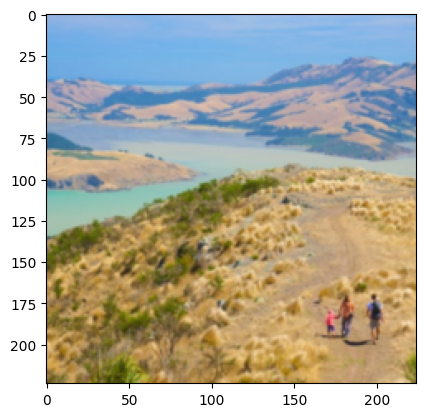

In [5]:
# initalizing the RGB transform class
rgb_transform = RGBTransform(imagenet_default_mean_and_std=False)
img_pil = rgb_transform.load('./input.jpg')
img_pil = rgb_transform.preprocess(img_pil)
img_pil = center_crop(img_pil, (min(img_pil.size), min(img_pil.size))).resize((224,224))
img = rgb_transform.postprocess(img_pil).unsqueeze(0).to(device)
# verfiy the normalization
plt.imshow(denormalize(img, mean=IMAGENET_INCEPTION_MEAN, std=IMAGENET_INCEPTION_STD)[0].cpu().permute(1, 2, 0))
print(f"Shape of the input image is: {img.shape}, \n that stands for [Batch Size, Channels, Height, Width]")

Now lets encode the input image using the RGB tokenizer:


In [6]:
tokenized_rgb = toks['tok_rgb'].tokenize(img)
print(f"We have tokenized the Image input which results in discrete tokens. The shape of the tokenized tensor is f{tokenized_rgb.shape}")

/work/com-304/new_environment/anaconda3/envs/fourm/lib/python3.9/site-packages/fourm/vq/models/vit_models.py:495: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(enabled = False):


We have tokenized the Image input which results in discrete tokens. The shape of the tokenized tensor is ftorch.Size([1, 14, 14])


Note that we can also say that the tokenized representation of the data type compresses the data present in its original format. 4M uses such tokenized representation of the data in its training.

### We should carefully examine what does the tokenized tensor for RGB image contains. Here each entry of the tensor represent one token index.

In [7]:
tokenized_rgb

tensor([[[15229, 12818,  5752, 10580,  6736,  4550,  9163,  9469,  7577, 15861,
          14658, 10191,  1153,   657],
         [ 8893,  9476,  6005,  7849, 15187,  1930,  1573, 12411,  5102, 11574,
          11775, 11780,  3849, 10861],
         [  120, 11002,  8035,  1535, 15713, 11680, 10852, 10785,  9239, 12405,
           5733,  8395, 15639,  6809],
         [ 8498,  6234, 11562, 10435,  3935, 13275,  2430, 12804,  9366, 15138,
            226,  2619, 15521,  2708],
         [ 9603,  5912,  7280,  3453,  9421, 14902,  2132, 16331, 13888,  9454,
           5784,  9474,  3931,  2169],
         [ 6828,  5621,  6199, 15573, 13190, 15459,  6386, 11918,  3699,  3315,
          14147,  7405,   732,  2843],
         [ 9861,  5220,  8821,  1623,   349,  1880,  3958, 15774,  3243,  4682,
           4584, 12629, 13730, 16071],
         [ 7062,  2173, 12037,  6336,   976,  4829,  8381,  8123,  7792, 15491,
           5447, 10944, 11243,  3526],
         [ 5484,    93,  5272, 11885,  5201,  17

### Detokenization

One of the core properties of a tokenizer is that we can always retrieve a (lossy) version of the original input through a process called detokenization. This process takes the tokenized data and passes it through the tokenizer decoder, which reconstructs the tokens back into the original data.

Note that this process is lossy, and the quality of the reconstructed image may be degraded.


In [8]:
reconstructed_rgb = toks['tok_rgb'].decode_tokens(tokenized_rgb, image_size=224, timesteps=19)

/work/com-304/new_environment/anaconda3/envs/fourm/lib/python3.9/site-packages/fourm/vq/scheduling/diffusion_pipeline.py:124: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=False):


In [9]:
reconstructed_rgb.shape

torch.Size([1, 3, 224, 224])

Nice, we see that we have obtained a reconstructed RGB image data type of same shape as of the original RGB. Lets try to visualize it, and observe how the reconstruction looks like.

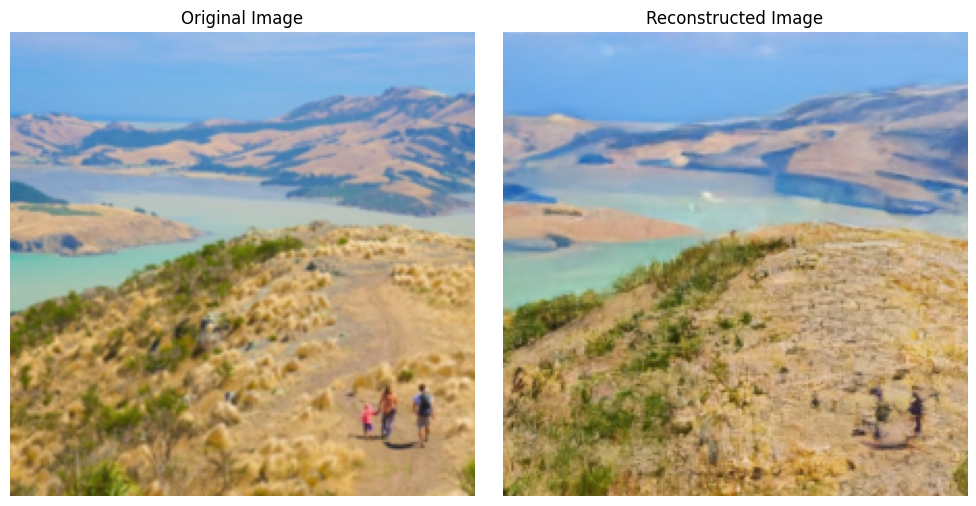

In [10]:
# reconstructed_rgb
# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Display the original image on the left
axes[0].imshow(denormalize(img, mean=IMAGENET_INCEPTION_MEAN, std=IMAGENET_INCEPTION_STD)[0].permute(1, 2, 0).cpu())
axes[0].set_title("Original Image")
axes[0].axis("off")  # Hide axes

# Display the reconstructed image on the right
axes[1].imshow(denormalize(reconstructed_rgb, mean=IMAGENET_INCEPTION_STD, std=IMAGENET_INCEPTION_STD)[0].permute(1, 2, 0).cpu())
axes[1].set_title("Reconstructed Image")
axes[1].axis("off")  # Hide axes

# Show the figure
plt.tight_layout()
plt.show()

Not bad! Although the resulting image is not of same quality, we can still see the high-level semantic similarity between the two images.

### Text tokenization

We show another example of how we can tokenize text data type. This is infact more simpler than image/2D based tokenizers, both interms of training and quality.


In [11]:
input_text = "Welcome to the Communications Course at EPFL"

# Encode the text
encoded = text_tok.encode(input_text)

# Get token IDs
token_ids = encoded.ids
print("Token IDs:", token_ids)

# Get tokens
tokens = encoded.tokens
print("Tokens:", tokens)

Token IDs: [8580, 4953, 4912, 17667, 8262, 4974, 7386, 6672]
Tokens: ['welcome', 'to', 'the', 'communications', 'course', 'at', 'ep', '##fl']


Notice how each token represents a word in the English Vocabulary. For example, token 8580 represents the word 'welcome'. 

Now lets see the detokenization as well.

In [12]:
# Decode the token IDs back to text
decoded_text = text_tok.decode(token_ids)
print("**Decoded Text:**", decoded_text)

**Decoded Text:** welcome to the communications course at epfl


# **Exercise 1: Tokenization [25 points]**

By now, you should have a basic understanding of tokenizers, their purpose, and how to use them.

For this graded exercise, provide solutions using markdown blocks (like this current cell is a markdown) and code cell blocks (where code implementation is necessary). Please provide solutions to the following questions:

### **1. Exploring the resolution / quality trade-off**
- Based on the quality of the reconstructed RGB input, can we improve the reconstruction using the same tokenizer?
- **Ablation on Resolution:**
    - i) Perform reconstructions using image resolutions between 224x224 and 448x448 (in resolution steps of 32, i.e. using side-lengths [224, 256, 288, 320, 352, 384, 416, 448]). What do you notice? What are the implications of using more tokens to represent an image?
    - ii) Imagine if you have an image of size 640x640 and you could use the same tokenizer to perform a reconstruction. Without performing any reconstruction experiment, can you tell if the reconstruction will be better if we use a very high-resolution image (like 640x640) for this same trained tokenizer? Provide evidence to your claim by performing experimentation with images having resolution more than 448.
      
      **Caution**: We do not expect it to work outside the resolution bounds but that you should try and see for yourselves, and provide intuitive explanation why this could be the case.
    - iii) We have seen the values represented by the different entries in the tokenized tensor `tokenized_rgb`. What is the minimum possible value of the tensor, and what is the maximum possible value of the tensor?
    
      **Hint:** You must revisit and properly understand the tokenization section discussed earlier, in order to provide correct answer to this question.
- **Ablation on the diffusion decoder timesteps:** The RGB detokenizer is a [diffusion model](https://scale.com/guides/diffusion-models-guide) that denoises a random image in `t` timesteps, using the tokens as conditioning. Show reconstructions (using both 224, and 448 res. images) for 1, 10, 20, 50, 100 timesteps. What do you notice?
- Visualize your solutions and provide an intuitive explanation of how your modifications improve the reconstruction.

In [22]:
reconstructed_rgbs = []
resolutions = [224, 256, 288, 320, 352, 384, 416, 448]
for i in resolutions:
    reconstructed_rgbs.append(toks['tok_rgb'].decode_tokens(tokenized_rgb, image_size=i, timesteps=19))

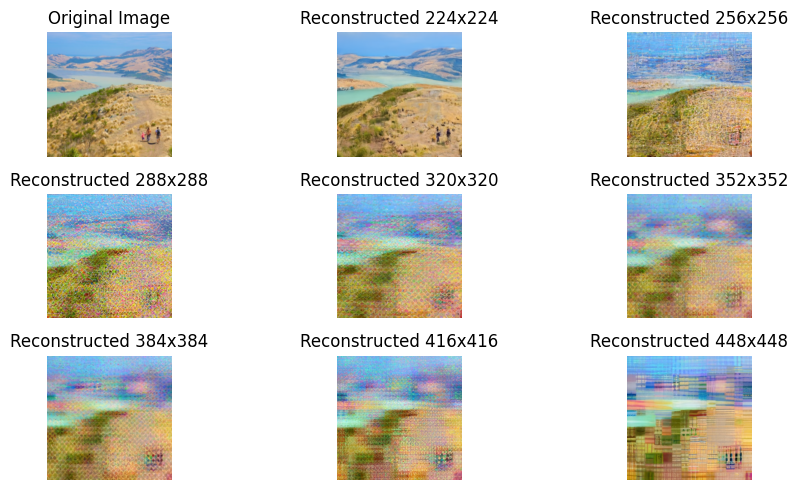

In [23]:
# reconstructed_rgb
# Create a figure with two subplots (3 row, 3 columns)
fig, axes = plt.subplots(3, 3, figsize=(10, 5))
axes = axes.flatten()

# Display the original image 
axes[0].imshow(denormalize(img, mean=IMAGENET_INCEPTION_MEAN, std=IMAGENET_INCEPTION_STD)[0].permute(1, 2, 0).cpu())
axes[0].set_title("Original Image")
axes[0].axis("off")  # Hide axes

# Display the reconstructed images
for idx, rec_img in enumerate(reconstructed_rgbs):
    axes[idx + 1].imshow(denormalize(rec_img, mean=IMAGENET_INCEPTION_MEAN, std=IMAGENET_INCEPTION_STD)[0].permute(1, 2, 0).cpu())
    axes[idx + 1].set_title(f"Reconstructed {resolutions[idx]}x{resolutions[idx]}")
    axes[idx + 1].axis("off")
# Show the figure
plt.tight_layout()
plt.show()

i) Perform reconstructions using image resolutions between 224x224 and 448x448 (in resolution steps of 32, i.e. using side-lengths [224, 256, 288, 320, 352, 384, 416, 448]). What do you notice? What are the implications of using more tokens to represent an image?

More tokens does not improve the quality of the reconstructed image. Actually the higher resolution we use, the worse result we get.

ii) Imagine if you have an image of size 640x640 and you could use the same tokenizer to perform a reconstruction. Without performing any reconstruction experiment, can you tell if the reconstruction will be better if we use a very high-resolution image (like 640x640) for this same trained tokenizer? Provide evidence to your claim by performing experimentation with images having resolution more than 448.

It will not provide better result with higher resolution.

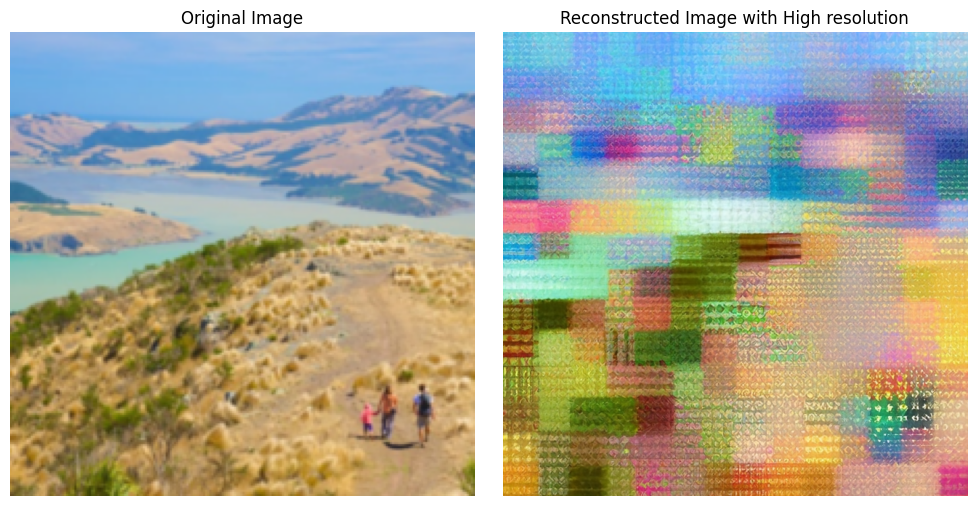

In [24]:
# reconstructed_rgb with high resolution
highres_rec_rgb = toks['tok_rgb'].decode_tokens(tokenized_rgb, image_size=640, timesteps=19)


# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Display the original image on the left
axes[0].imshow(denormalize(img, mean=IMAGENET_INCEPTION_MEAN, std=IMAGENET_INCEPTION_STD)[0].permute(1, 2, 0).cpu())
axes[0].set_title("Original Image")
axes[0].axis("off")  # Hide axes

# Display the reconstructed image on the right
axes[1].imshow(denormalize(highres_rec_rgb, mean=IMAGENET_INCEPTION_STD, std=IMAGENET_INCEPTION_STD)[0].permute(1, 2, 0).cpu())
axes[1].set_title("Reconstructed Image with High resolution")
axes[1].axis("off")  # Hide axes

# Show the figure
plt.tight_layout()
plt.show()

iii) We have seen the values represented by the different entries in the tokenized tensor tokenized_rgb. What is the minimum possible value of the tensor, and what is the maximum possible value of the tensor?

In [25]:
print(f"Min value: {tokenized_rgb.amin()}")
print(f"Max value: {tokenized_rgb.amax()}")

Min value: 14
Max value: 16359


### **2. Exploring Different Tokenizers**
- We have provided 10 additional tokenizers in this notebook, all following the same usage style (see the tokenizer loading section).
- Choose the semantic segmentation (semseg) tokenizer from the list and implement a working solution similar to the previous question. Use the provided segmentation images at location `data/semseg_images_exercise_1`.
- Do the findings from Question 1 also apply to the new tokenizer? Explain why or why not.
- **Hint 1:** The most critical aspects to consider are the correct data loading and the necessary transformations.
- **Hint 2:** You will find useful guidance on modality-specific transformations here: [Tokenizer-Specific Transforms](https://github.com/apple/ml-4m/blob/9e2a6931f625429b3280e8b355708dc4c30e881d/fourm/data/modality_info.py#L412), For tokenization: [Tokenization Script for 4M Training Data](https://github.com/apple/ml-4m/blob/main/save_vq_tokens.py) and plotting [semseg results.](https://github.com/apple/ml-4m/blob/9e2a6931f625429b3280e8b355708dc4c30e881d/fourm/utils/plotting_utils.py#L249)

In [ ]:
tokenized_semseg = toks['tok_semseg'].tokenize(img)

In [ ]:
# Show your solution here. You can use multiple cells.

### **3. Tokenizing Video Data**  
- In the previous exercises and examples, we showed how to use different tokenizers. Now, Let us consider that we want to add another modality, **Videos**, into the 4M model.
- A usual step would be to train a dedicated video tokenizer for this task, however, we will explore if we can already get some results using our existing single-image tokenizers.
- Your task is to implement and demonstrate the tokenization process on a sample video and compare the reconstruction results side by side. What do you notice?
    - Load the video
    - process/apply required transformations to the video
    - tokenize and detokenize the processed video
    - visualize the results
- We provide sample videos for the exercise at location `data/videos_exercise_1`
- **Hint:** For loading and visualizing the videos, we below provide helper functions:

In [ ]:
from decord import VideoReader, cpu

# Use this function to load the video and obtain a tensor of video-frames
def load_sampled_frames(video_path, step=10):
    """
    Load a video and return sampled frames.

    Args:
        video_path (str): Path to the video file.
        step (int): Step size for sampling frames (default is every 10 frames).

    Returns:
        np.ndarray: Array of sampled frames (shape: N x H x W x C).
    """
    vr = VideoReader(video_path, ctx=cpu(0))  # Use CPU
    num_frames = len(vr)

    # Sample frames at the given step interval
    sampled_indices = np.arange(0, num_frames, step)
    sampled_frames = vr.get_batch(sampled_indices).asnumpy()  # Convert to NumPy array

    return sampled_frames

# After you have processed/transformed video, use the below function to save it
def save_video_tensor(processed_video, video_file_path, save_name='original'):
    # processed_video: Processed Video Tensor of shape: T, H, W, C
    # video_file_path: path to the original video
    # save_name: either original or reconstructed

    # returns: the path to the video saved on disk
    video_filename = os.path.basename(video_file_path) + f"_{save_name}.webm"
    fourcc = cv2.VideoWriter_fourcc(*'VP90')  # VP9 codec for WebM
    fps = 5  # Frames per second
    T, C, H, W = processed_video.shape
    print(processed_video.shape)
    processed_video_save = denormalize(processed_video, mean=IMAGENET_INCEPTION_MEAN, std=IMAGENET_INCEPTION_STD)
    processed_video_np = (np.array(processed_video_save.permute(0, 2, 3, 1).cpu()) * 255).astype(np.uint8)
    print(processed_video_np.shape)
    # Create video writer
    video_writer = cv2.VideoWriter(video_filename, fourcc, fps, (W, H))
    
    # Write frame
    for i in range(T):
        # print(processed_video_np[i].shape)
        frame = cv2.cvtColor(processed_video_np[i], cv2.COLOR_RGB2BGR)  # Convert RGB to BGR for OpenCV
        video_writer.write(frame)
    
    video_writer.release()  # Save the file
    print(f"{save_name} video has been successfully saved: {video_filename}")
    return video_filename

# After saving the videos (both original and reconstructed), use the below code snippet to display both videos
from IPython.display import display, HTML, Video

# Uncomment the below to display the videos after they have been saved. 
# video_html = f"""
# <table>
#     <tr>
# <td style="text-align: center;"><b>Original</b></td>
#         <td style="text-align: center;"><b>Reconstructed</b></td>
#     </tr>
#     <tr>
#         <td>{Video(saved_path_original, embed=True)._repr_html_()}</td>
#         <td>{Video(saved_path_reconstructed, embed=True)._repr_html_()}</td>
#     </tr>
# </table>
# """

# display(HTML(video_html))

In [ ]:
# Show your solution here. You can use multiple cells.

# 2. **RGB to Any-Other-Modality Generation**

Now that you have learned the basics of tokenizers and how to use them, we will proceed with using 4M, which takes tokenized data inputs and generates any other tokenized data as output.

First, we will understand how to generate new predictions from RGB images. RGB is the most common visual input, as it can be easily captured using common cameras. It is interesting to see that using the 4M model, we can directly generate other types of information from RGB images, such as captions, depth maps, or bounding boxes.

Let's get started!


### Load a 4M-21 model

Let's load a 4M-21 Base model that was trained on 21 modalities, including RGB, depth, surface normals, semantic segmentation, SAM instances, Canny & SAM edges, 3D human poses, CLIP-B/16 features, DINOv2-B/14 features, ImageBind-H/14 features, captions, metadata, color palette and bounding boxes. It can take any combination of those modalities as input, and can predict all of them. We wrap the model in a `GenerationSampler` which provides inference utilities.

Please see [official repo's](https://github.com/apple/ml-4m) `README.md` for all available 4M and tokenizer models.

In [ ]:
fm = FM.from_pretrained('EPFL-VILAB/4M-21_B').eval().to(device)
sampler = GenerationSampler(fm)

Lets play with the same image, we utilized for the tokenization part 

In [ ]:
rgb_transform = RGBTransform(imagenet_default_mean_and_std=True) # for input to 4M, we use normalization with default imagenet normalization parameters
img_pil = rgb_transform.load('./input.jpg')
img_pil = rgb_transform.preprocess(img_pil)
img_pil = center_crop(img_pil, (min(img_pil.size), min(img_pil.size))).resize((224,224))
img = rgb_transform.postprocess(img_pil).unsqueeze(0).to(device)
img_pil

Given an RGB input, predict the other user-chosen modality. Inference or generation is performed by providing a *generation schedule* to the `GenerationSampler`.

A *generation schedule* specifies the order of modalities to generate, and for each, it includes generation parameters such as the number of steps or temperature.

For example:

We can generate RGB-to-Depth directly, or by using chaining, which allows us to first generate the intermediate modalities and then generate the final modality (e.g., RGB to Surface Normal to Depth).

In this section, we will consider generations *without* using the intermediate modality.


4M operates on a dictionary of the input and target modalities that for each modality hold the actual token values (or pixels for RGB), input and target masks that specify which of the tokens are used as input and which need to be predicted, as well as attention masks for the decoder. Wherever the `input_mask` is `False`, the corresponding entries are used as input, wherever it is `True` the tokens are ignored. Wherever the `target_mask` is `False`, the corresponding entries are predicted as targets, wherever it is `True` nothing is predicted. 

The dictionary is formatted in the following way, with B = batch size, and N = sequence length of each respective modality:

```python
sample_dict = {
    modality_id: {
        'tensor': ..., # Contains the discrete tokens ()
        'input_mask': ..., # Boolean Tensor of shape B x N, where False = used as input, and True = ignored.
        'target_mask': ..., # Boolean Tensor of shape B x N, where False = predicted as target, and True = ignored.
        'decoder_attention_mask': ..., # Tensor containing the decoder attention pattern. Not used during inference.
    },
    ...
}
```

Below we define a parent function `create_generation_schedule_rgb_to_others`, that uses the `build_chained_generation_schedules` which instructs the model about user-provided input and output modality generation. 

In [ ]:
def create_generation_schedule_rgb_to_others(
    target_domains, decoding_steps, temps,
    cfg_scales, img, cfg_grow_conditioning=True
):
    """
    Create RGB to any other conditional domain
    """
        
    cond_domain = ['rgb@224']
    cfg_schedules = [cfg_schedules_dict[target_domain] for target_domain in target_domains]
    temp_schedules = cfg_schedules
    autoregression_schemes = [autoregression_schemes_dict[target_domain] for target_domain in target_domains]
    tokens_per_targets = [tokens_per_target_dict[target_domain] for target_domain in target_domains]
    token_decoding_schedules = ['linear' if 'tok_' in target_domain else None for target_domain in target_domains]
    schedule = build_chained_generation_schedules(
        cond_domains=cond_domain, 
        target_domains=target_domains, 
        tokens_per_target=tokens_per_targets, 
        autoregression_schemes=autoregression_schemes, 
        decoding_steps=decoding_steps, 
        token_decoding_schedules=token_decoding_schedules, 
        temps=temps, 
        temp_schedules=temp_schedules,
        cfg_scales=cfg_scales, 
        cfg_schedules=cfg_schedules, 
        cfg_grow_conditioning=cfg_grow_conditioning
    )
    
    batched_sample = {
        'rgb@224': {
            'tensor': img, # Batched tensor
            'input_mask': torch.zeros(1, 196, dtype=torch.bool, device=device), # False = used as input, True = ignored
            'target_mask': torch.ones(1, 196, dtype=torch.bool, device=device), # False = predicted as target, True = ignored
        }
    }

    # Initialize target modalities
    for target_mod, ntoks in zip(target_domains, tokens_per_targets):
        batched_sample = init_empty_target_modality(batched_sample, MODALITY_INFO, target_mod, 1, ntoks, device)
    
    # Initialize input modalities
    for cond_mod in cond_domain:
        batched_sample = init_full_input_modality(batched_sample, MODALITY_INFO, cond_mod, device, eos_id=text_tok.token_to_id("[EOS]"))
    
    return schedule, batched_sample
    

### Notes on function `create_generation_schedule_rgb_to_others`

The above defined function defines a generation pipeline, where the starting modality is RGB, and we predict other modalities from it. This function acts as a wrapper on top of `build_chained_generation_schedules` so that we abstract away most hyper-parameters and configuration used for the generation process.

### Function Arguments:

The arguments used in the function are as follows:

- `target_domains`: Defines the output modality; in our first case, we will use a caption (text) as the output modality.
- `decoding_steps`: Specifies the number of decoding steps (if applicable).

**NOTE**: The `decoding_steps` argument is only valid for 2D modalities such as Depth, Surface Normals etc. For textual modalities, we perform auto-regressive prediction, so it is set to `None`. For image-like modalities, we use iterative decoding prediction that produces the final prediction using a number of iterations set to `decoding_steps`. Remember that, the `decoding_steps` is different from the `timestamps` variable we explored during tokenization. Please read the details on different decoding strategies explained in [the 4M paper](https://arxiv.org/pdf/2312.06647) (Sec. A.3, Page 21).

- `temps`: Controls randomness in sampling (higher values lead to more diverse outputs).
- `cfg_scales`: [Classifier-free guidance](https://arxiv.org/abs/2207.12598) scale; higher values bias the output towards deterministic behavior. Setting it to 1 means that no classifier-free guidance is performed.
- `img`: The input image for the generation process.
- `cfg_grow_conditioning`: (True or False) Determines whether the generated modalities are used as positive guidance signal when generating subsequent modalities.


### Example 1: Image to Caption using 4M
We have now defined the function for generation pipeline for RGB as input. Lets use the image as input and predict caption. Note and understand each argument used while calling the function.

In [ ]:
# Example 1 usage: RGB to Caption
schedule, batched_sample = create_generation_schedule_rgb_to_others(
    target_domains=['caption'], # using caption as output
    decoding_steps=[None], # Put None for autoregressive decoding
    temps=[0.01], # temperature value
    cfg_scales=[1.0], # Classifier-free guidance scale
    img=img,
    cfg_grow_conditioning=True,
)

After defining our inputs and targets, we perform inference with 4M model to obtain `out_dict` that contains the token predictions from 4M. To convert the tokens into respective modality, we perform de-tokenization, which converts the discrete tokens back to original data type 

Now we are ready to perform the generation. The `GenerationSampler` has a `.generate` function that performs the chained generation on a given sample dictionary, following the previously specified generation schedule.
It outputs a dictionary that is formatted in the same manner as the sample dictionary, but contains also the predicted tokens. You can change the seed to get different outputs, or set it to None to randomly sample.

4M / the sampler outputs discrete tokens, and we still need to decode them to images, feature maps, text, etc using the modality-specific tokenizers. 
For that, we provide the `decode_dict` function that takes as input the sample dictionary and the tokenizers, and returns plottable representations of each modality.
Some modalities like RGB, depth and normals use a diffusion model as the tokenizer decoder. You can specify the number of DDIM steps for decoding with `decoding_steps`.

#### Additional hyper-parameters for generation:

We can additionally choose the top-k & top-p hyperparameters:

**top_p:** When top_p > 0.0, keep only the top tokens with cumulative probability >= top_p (a.k.a. nucleus filtering).

**top_k:** When top_k > 0, keep only the top k tokens with highest probability (a.k.a. top-k filtering).

In [ ]:
top_p = 0.8
top_k = 0.0

In [ ]:
out_dict = sampler.generate(
    batched_sample, schedule, text_tokenizer=text_tok, 
    verbose=True, seed=0,
    top_p=top_p, top_k=top_k,
)
# performing detokenization
dec_dict = decode_dict(
    out_dict, toks, text_tok, 
    image_size=224, patch_size=16,
    decoding_steps=50
)

Image to Caption generation has been completed. It is now time to visualize the results!!

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,4), facecolor=(1, 1, 1))

ax[0].imshow(img_pil)
ax[0].set_title('RGB input', fontsize=18)

plot_text_in_square(ax[1], dec_dict['caption'][0], wrap_width=16, fontsize=14)
ax[1].set_title('Caption pred.', fontsize=18)


for axis in ax.flatten():
    axis.set_axis_off()

plt.tight_layout()
plt.show()

We see that a caption data type (or modality) is predicted by the 4M model - Not bad! We will later see how to improve the generations, using chaining.

### Example 2: Image to Semantic Segmentation Generation

Now, we will see how we can generate Semantic Segmentation using the 4M model. Here, again our input is the RGB image, and our target (output) modality is the tokenized semantic segmentation. 

In [ ]:
# Example 2 usage: RGB to Semantic Segmentation
schedule, batched_sample = create_generation_schedule_rgb_to_others(
    target_domains=['tok_semseg@224'], # using caption as output
    decoding_steps=[1], # Decode in a single step, i.e. one-shot
    temps=[0.01], # temperature value
    cfg_scales=[2.0], # Some slight classifier-free guidance
    img=img,
    cfg_grow_conditioning=True,
)

In [ ]:
# As we want to predict the segmentation tokens, our tensor at the start for segmentation is all initialized from zero.
batched_sample['tok_semseg@224']['tensor']

In [ ]:
top_p=0.8
top_k=0.0
out_dict = sampler.generate(
    batched_sample, schedule, text_tokenizer=text_tok, 
    verbose=True, seed=0,
    top_p=top_p, top_k=top_k,
)
dec_dict = decode_dict(
    out_dict, toks, text_tok, 
    image_size=224, patch_size=16,
    decoding_steps=50
)

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,4), facecolor=(1, 1, 1))

ax[0].imshow(img_pil)
ax[0].set_title('RGB input', fontsize=18)

ax[1].imshow(dec_dict['tok_semseg@224'])
ax[1].set_title('Semantic segmentation pred.', fontsize=18)

for axis in ax.flatten():
    axis.set_axis_off()

plt.tight_layout()
plt.show()

In [ ]:
dec_dict['tok_semseg@224'].shape # remember that for plotting purposes, the Semseg map is converted to 3 channel RGB image

# **Exercise 2: RGB to Other Modality Generation [15 points]**

In this exercise, you will explore generating different modalities using **only** an RGB image as the input. Additionally, you will analyze the impact of different hyperparameters in the scheduler function and assess the consistency of the generated outputs.


### **1. Generate and Visualize Predictions**

Using the 4M framework, generate and visualize the following modalities using an **RGB image as the only conditioning input**:

- **CLIP**
- **Depth**
- **Metadata**
- **Bounding Boxes**
- **SAM Edges**
- **Canny Edges**
- **ImageBind**
- **DINOV2**
- **Color Palette**

The corresponding **target names** for these modalities can be found in the official resource:
[MODALITY_INFO](https://github.com/apple/ml-4m/blob/ee81e40983616e9737f444068572f0bac9961abe/fourm/data/modality_info.py#L32).

**Optional (ungraded):** Use a custom image of your choice and perform the same exercise. 

*Below, we have provided plotting helper codes at the end of the questions to assist in visualizing the outputs.*

```python
# displaying Visual/2D Modalties

ax[1].imshow(dec_dict['tok_depth@224'])
ax[1].set_title('Depth pred.', fontsize=18)

# displaying bounding boxes
ax[1].imshow(visualize_bboxes(np.array(img_pil), dec_dict['det'][0],))
ax[1].set_title('Bounding boxes pred.', fontsize=18)

# displaying text
plot_text_in_square(ax[1], dec_dict['caption'][0], wrap_width=16, fontsize=14)

# displaying meta data
metadata_pred = ',\n'.join([f'{k}: {v:.2f}' if isinstance(v, float) else f'{k}: {v}' for k, v in dec_dict['metadata'].items()])
plot_text_in_square(ax[1], metadata_pred, wrap_width=36, fontsize=13)

# SAM/Canny edges
ax[1].imshow(dec_dict['tok_sam_edge@224'], cmap='gray')
ax[1].set_title('SAM edges pred.', fontsize=18)


```




In [ ]:
# Show your solution here. You can use multiple cells.

### **2. Understanding and Ablating Function Arguments**  

The `create_generation_schedule_rgb_to_others` function takes several arguments that control the **generation process**. In this exercise, we will analyze their impact on the results generated for 2D modalities.  

- For each **hyperparameter**, including `decoding_steps`, `temps`, and `cfg_scales`, re-generate and visualize Depth, Surface Normal, Semseg as the output modalities using the following configurations:  
    - `decoding_steps`: 1, 10, 30, 50  
    - `temps`: 0.0, 0.01, 0.05, 0.1, 0.5, 0.9, 3.0  
    - `cfg_scales`: 1, 2, 3, 5, 10  

- What trends do you observe in generation quality as each hyperparameter is varied?  
  **Note:** When performing ablations on one hyperparameter, keep the values of the other two fixed.  

- **Ablations on sampling:** Previously, we used an additional sampling parameter, **top_p**. Now, we will examine its effect on the **caption** output modality. Before proceeding, make sure you have set the `temps` to **0.5** and set `seed=None` in the `sampler.generate` function. Analyze the impact of `top_p` using the following values:  
    - [0.0, 0.01, 0.2, 0.5, 0.7, 0.9, 0.95, 1]  
    - What is the optimal value for achieving a maximally deterministic/most probable result? Generate examples using the optimal value.
    - What is the optimal value for achieving a maximally diverse caption generation? Generate examples using the optimal value.
    - Hint: you should understand **Top P**, that would help you to provide correct answers especially for the last two questions, (without even running any experiment!). More details on [Top P can be found here.](https://www.vellum.ai/llm-parameters/top-p)

**Hint:** Additional relevant information on the generation arguments can be found in [this resource](https://github.com/apple/ml-4m/blob/main/README_GENERATION.md).


In [ ]:
# Show your solution here. You can use multiple cells.

In [ ]:
# Show your solution here. You can use multiple cells.

# 3. **RGB to Any-Other-Modality Generation with Chaining**



### RGB → All

Given an RGB input, predict all other modalities in a sequential manner.
We utilize the same function, `build_chained_generation_schedules`, which also allows for building arbitrary chained generation schedules.
We call it chained generation because every newly generated output is looped back into the input and serves as conditioning for subsequently generated modalities.
This enables the generation of multiple modalities that are all consistent with each other, which is particularly important when the conditioning is underspecified.
Please see the paper [here](https://arxiv.org/pdf/2312.06647) for more details on chained generation.

In the following, we provide an RGB image as input (pixels, not tokens) and predict all other modalities from it.


We will explore if we can improve the generation quality and consistency by performing chained generations. 

As a first example, let us include all possible modalities as the middle ones that are chained together to generate the semantic segmentation.

In [ ]:
img_pil

In [ ]:
target_domains = [
    'tok_clip@224', 'tok_dinov2@224', 'tok_imagebind@224', 'tok_depth@224', 
    'tok_normal@224', 'tok_canny_edge@224', 'tok_sam_edge@224', 
    'caption', 'det', 'human_poses', 'sam_instance', 'color_palette', 'metadata', 'tok_semseg@224'
]
decoding_steps = [1, 1, 1, 1, 1, 1, 1, None, None, None, None, None, None, 1]
temps = [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.6, 0.7, 0.1, 0.01, 0.1, 0.1, 0.01]
cfg_scales = [2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0]
cfg_grow_conditioning = True
top_p, top_k = 0.8, 0.0

schedule, batched_sample = create_generation_schedule_rgb_to_others(
    target_domains=target_domains, # generation order will respect the order of modalities defined in this list
    decoding_steps=decoding_steps,
    temps=temps, # temperature value
    cfg_scales=cfg_scales,
    img=img,
    cfg_grow_conditioning=True,
)

Now, lets use 4M and generate the outputs!

In [ ]:
out_dict = sampler.generate(
    batched_sample, schedule, text_tokenizer=text_tok, 
    verbose=True, seed=0,
    top_p=top_p, top_k=top_k,
)
dec_dict = decode_dict(
    out_dict, toks, text_tok, 
    image_size=224, patch_size=16,
    decoding_steps=50
)

Let's plot the RGB input and all predicted outputs!


In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=6, figsize=(25,12), facecolor=(1, 1, 1))

ax[0,0].imshow(img_pil)
ax[0,0].set_title('RGB input', fontsize=18)

ax[0,1].imshow(dec_dict['tok_depth@224'])
ax[0,1].set_title('Depth pred.', fontsize=18)

ax[0,2].imshow(dec_dict['tok_normal@224'])
ax[0,2].set_title('Surface normals pred.', fontsize=18)

ax[0,3].imshow(dec_dict['sam_instance'])
ax[0,3].set_title('SAM instances pred. (single pass)', fontsize=18)

ax[0,4].imshow(visualize_bboxes(np.array(img_pil), dec_dict['det'][0],))
ax[0,4].set_title('Bounding boxes pred.', fontsize=18)

plot_text_in_square(ax[1,1], dec_dict['caption'][0], wrap_width=16, fontsize=14)
ax[1,1].set_title('Caption pred.', fontsize=18)

ax[1,2].imshow(dec_dict['tok_canny_edge@224'], cmap='gray')
ax[1,2].set_title('Canny edges pred.', fontsize=18)

ax[1,3].imshow(dec_dict['tok_sam_edge@224'], cmap='gray')
ax[1,3].set_title('SAM edges pred.', fontsize=18)

ax[1,4].imshow(dec_dict['human_poses'])
ax[1,4].set_title('Human poses pred.', fontsize=18)

ax[1,5].imshow(dec_dict['color_palette'])
ax[1,5].set_title('Color palette pred.', fontsize=18)

ax[2,1].imshow(dec_dict['tok_clip@224'])
ax[2,1].set_title('CLIP pred. (PCA viz.)', fontsize=18)

ax[2,2].imshow(dec_dict['tok_dinov2@224'])
ax[2,2].set_title('DINOv2 pred. (PCA viz.)', fontsize=18)

ax[2,3].imshow(dec_dict['tok_imagebind@224'])
ax[2,3].set_title('ImageBind pred. (PCA viz.)', fontsize=18)

metadata_pred = ',\n'.join([f'{k}: {v:.2f}' if isinstance(v, float) else f'{k}: {v}' for k, v in dec_dict['metadata'].items()])
plot_text_in_square(ax[2,4], metadata_pred, wrap_width=36, fontsize=13)
ax[2,4].set_title('Metadata pred.', fontsize=18)

ax[2,5].imshow(dec_dict['tok_semseg@224'])
ax[2,5].set_title('Semantic segmentation pred.', fontsize=18)

for axis in ax.flatten():
    axis.set_axis_off()

plt.tight_layout()
plt.show()

### Quantitative Evaluation of 4M Predications

So far, we have mainly relied on the qualitative visualizations to study and compare different kinds of generations. Additionally, it is a common practice to benchmark model results on evaluation datasets for a holistic overview of model performance. 

We will now evaluate 4M Semantic Segmentation performance on a sub-sampled test set from COCO dataset. The COCO (Common Objects in Context) dataset is a large-scale dataset for object detection, segmentation, and captioning. It contains over 330K natural images with 80 object categories that cover multiple indoor and outdoor settings with rich contextual information.


For evaluation, we select 50 test images from COCO Validation set, and generate segmentation results using 4M model. 

##### **Evaluation Metric: Mean Intersection over Union (mIoU)**  

To quantitatively evaluate our 4M model's semantic segmentation performance, we employ the Mean Intersection over Union (mIoU) metric, which is widely considered the standard evaluation measure in semantic segmentation tasks.

The mIoU metric measures how accurately the predicted segmentation masks align with ground truth annotations. For each semantic class, an Intersection over Union (IoU) score is calculated:

$$\text{IoU} = \frac{\text{Area of Overlap}}{\text{Area of Union}} = \frac{\text{TP}}{\text{TP} + \text{FP} + \text{FN}}$$

Where the "Area of Overlap" represents correctly predicted pixels (true positives), and the "Area of Union" encompasses all pixels that are either predicted or ground truth for that class (true positives + false positives + false negatives). This ratio ranges from 0 to 1, with higher values indicating better segmentation accuracy.

The Mean IoU (mIoU) is then calculated by averaging individual IoU scores across all classes present in the dataset:

$$\text{mIoU} = \frac{1}{n} \sum_{i=1}^{n} \text{IoU}_i$$

Where n is the number of classes (80 for the COCO dataset). This metric provides a balanced assessment of segmentation quality across all object categories, regardless of their size or frequency in the dataset.


We provide the path for the dataset through a shared directory that contains the COCO validation set.

In [ ]:
DATASET_PATH = '/work/com-304/datasets/coco/val/' # path on IZAR cluster

### mIoU calculation using RGB --> Semseg generation pipeline

Similar to our previous procedure for generation, we will use 4M to generate semseg results by providing RGB as the input. 

In [ ]:
target_domains = ['tok_semseg@224']
decoding_steps = [1]
temps =  [0.01]
cfg_scales = [2.0]

cfg_grow_conditioning = True
top_p, top_k = 0.8, 0.0

Below we define several helper functions to properly load the dataset.

In [ ]:
def get_dataset(data_path, image_size=224, patch_size=16, text_tokenizer=None):
    """Get dataset for semantic segmentation evaluation."""
    modality_transforms = MODALITY_TRANSFORMS
    modality_transforms['semseg_coco'] = SemsegTransform(shift_idx_by_one=True)
    
    # Setup modality info
    loaded_domains = ['rgb@224', 'semseg_coco']
    modality_info = {mod: MODALITY_INFO[mod] for mod in loaded_domains}
    
    # Configure max tokens
    for k in modality_info:
        num_patches = (image_size // patch_size) ** 2
        if modality_info[k]['type'] == 'img':
            modality_info[k]['max_tokens'] = num_patches
            modality_info[k]['min_tokens'] = num_patches
        modality_info[k]["input_alphas"] = [0.]
        modality_info[k]["target_alphas"] = [0.]
        modality_info[k]["keep"] = ['all']

    # Setup transforms
    image_augmenter = CenterCropImageAugmenter(target_size=image_size, main_domain='rgb@224')
    transform = transforms.Compose([
        UnifiedDataTransform(
            transforms_dict=modality_transforms, 
            image_augmenter=image_augmenter
        ),
        UnifiedMasking(
            modality_info=modality_info,
            text_tokenizer=text_tokenizer,
            input_tokens_range=768,
            target_tokens_range=768
        ),
    ])

    # Setup domains and paths
    domains_without_vq = [domain for domain in loaded_domains 
                         if not modality_info[domain].get("requires_tokenizer", False)]
    modality_paths = {mod: modality_info[mod]['path'] 
                     for mod in modality_info 
                     if modality_info[mod].get('path', None) is not None}
    
    # Create dataset
    dataset = MultiModalDatasetFolder(
        data_path,
        domains_without_vq,
        modality_paths=modality_paths,
        modality_transforms=modality_transforms,
        transform=transform
    )
    
    return dataset

In [ ]:
# Setup dataset and dataloader
# Note: Do not change values in this cell!
dataset = get_dataset(
    data_path=DATASET_PATH,
    image_size=224,
    patch_size=16,
    text_tokenizer=text_tok
)
dataset = SubsampleDatasetWrapper(dataset, dataset_size=50, seed=0)
loader = torch.utils.data.DataLoader(dataset, batch_size=1, num_workers=10)


Now we will generate the predictions on the 50 images of COCO Validation Set and compute the mIoU score.

In [ ]:
# Run evaluation
errors = []
logged_img_counter = 0
plotting_logs = []
for batch, _ in tqdm(loader):
    batched_sample = {
        'rgb@224': {k: v.to(device) for k, v in batch['rgb@224'].items()}
    }
    semseg_gt = batch['semseg_coco']['tensor'].unsqueeze(1).to(device)
    rgb = denormalize(batch['rgb@224']['tensor'], mean=IMAGENET_DEFAULT_MEAN, std=IMAGENET_DEFAULT_STD).permute(0,2,3,1)
    schedule, batched_sample = create_generation_schedule_rgb_to_others(
    target_domains=target_domains, # generation order will respect the order of modalities defined in this list
    decoding_steps=decoding_steps,
    temps=temps, # temperature value
    cfg_scales=cfg_scales,
    img=batched_sample['rgb@224']['tensor'],
    cfg_grow_conditioning=True,
    )
    out_dict = sampler.generate(
    batched_sample, schedule, text_tokenizer=text_tok, 
    verbose=True, seed=0,
    top_p=top_p, top_k=top_k,
    )
    dec_dict = decode_dict(
        out_dict, toks, text_tok, 
        image_size=224, patch_size=16,
        decoding_steps=50, to_rgb=False
    )
    output_argmax = dec_dict['tok_semseg@224'].argmax(1)
   
    output_argmax = rearrange(output_argmax, 'b h w -> b 1 h w')

    for i in range(len(semseg_gt)):
        # Save visualizations for first 10 images
        if i < 9:
            plotting_logs.append([rgb[i], semseg_gt[i], output_argmax[i]])

        # Calculate metrics
        metrics_argmax = get_semseg_metrics(output_argmax[[i]], semseg_gt[[i]])

        errors.append({
            'argmax': metrics_argmax,
        })

In [ ]:
# Lets print the average mIoU over the selected tiny test set
final_performance = [single_img_stats['argmax']['mean_iou'] for single_img_stats in errors]
final_performance = (sum(final_performance) / len(final_performance)) 

In [ ]:
print(f"mIoU result on the Test Set is : {final_performance}%")

**Lets also plot the results!**

In [ ]:
for index, single_prediction_list in enumerate(plotting_logs):
    if index < 5: # we plot first 5 predictions
        rgb_image = single_prediction_list[0]
        gt_segmentation_map = single_prediction_list[1]
        fourm_predicted_segmentation_map = single_prediction_list[2]
        plot_rgb2semseg(rgb_image, gt_segmentation_map, fourm_predicted_segmentation_map)

# **Exercise 3: Chained Generation for Improved Semantic Sementation on COCO Images [30 points]**

We have studied and explored how we can perform a chained generation that allows us to generate intermediate modalities before performing the final modality generation. Additionally, we quantitatively evaluated the 4M performance on a subset of COCO images.

In this part of the exercise, we will perform zero-shot COCO evaluation (on the same 50 images) and quantitatively measure the results with and without chained generation.  


### 1: SemSeg Evaluation using Chained Generation

Perform the following tasks:
1. Similar to RGB-only COCO evaluation, evaluate the performance of the chained generation using a maximum of 3 middle modalities. Specifically, perform the following chaining configurations and compute quantitative results:
    - RGB -> Depth -> SemSeg
    - RGB -> Depth -> Meta Data -> SemSeg
    - RGB -> -> CLIP -> DINOv2 -> SemSeg
    - RGB -> Meta Data -> Depth -> SemSeg
    - RGB -> CLIP -> SemSeg
    - RGB -> DINOv2 -> SemSeg
2. Compare the performance obtained in the first question with RGB-only evaluations and observe the trends.
    - Which configuration leads to the highest SemSeg performance? Based on your understanding so far, what could be the possible reason for this?
    - Which configuration leads to the lowest SemSeg performance? Based on your understanding so far, what could be the possible reason for this?
3. Based on the tutorial and exercise experiments:
   - Which order of modality generations leads to the highest mIoU score?  
   - If we are restricted to only a single modality as the middle one (options: Depth, DINOv2, CLIP, and Meta Data), which one should we use and why?

- **Recommendation:** For an intuitive answer for part 3, we recommend you to understand each modality.

In [ ]:
# Show your solution here. You can use multiple cells.

# 4. **Multiple inputs Conditioned Generation (Any to RGB Image Generation)**  

So far, we have explored leveraging 4M to generate other set of modalities from RGB images as input. Inference from RGB images to the other spatial tasks can be performed well in one shot, but for reverse generative tasks like caption-to-image we need to perform inference autoregressively. Since 4M can perform chained generation, we can break down the generation process into a schedule of first generating intermediate modalities before generating the ones we care about most. For example, we found that for text-to-image generation, generating CLIP features before RGB can improve generation fidelity.

Here, we aim to study and explore this opposite case and perform image generation from other set of modalities.

As the first step, lets try to generate an image just based on the caption:

In [ ]:
caption = 'a nice restaurant in santorini at sunset [S_1]'

In [ ]:
cond_domains = ['caption'] 
target_domains = ['tok_clip@224', 'tok_depth@224', 'tok_normal@224', 'tok_semseg@224', 'tok_rgb@224']
decoding_steps = [50, 8, 8, 8, 25]
temps = [5.0, 3.0, 3.0, 3.0, 3.0]
cfg_grow_conditioning = True
cfg_scales = [3.0, 2.0, 2.0, 2.0, 2.0]
top_p, top_k = 0.8, 0.0
# FIXED PARAMETERS, DO NOT CHANGE. (No need to understand them now).
cfg_schedules = [cfg_schedules_dict[target_domain] for target_domain in target_domains]
temp_schedules = ['onex:0.5:0.5' for single_entry in target_domains]
autoregression_schemes = [autoregression_schemes_dict[target_domain] for target_domain in target_domains]
tokens_per_targets = [tokens_per_target_dict[target_domain] for target_domain in target_domains]
token_decoding_schedules = ['linear' if 'tok_' in target_domain else None for target_domain in target_domains]

schedule = build_chained_generation_schedules(
    cond_domains=cond_domains, target_domains=target_domains, tokens_per_target=tokens_per_targets, autoregression_schemes=autoregression_schemes, 
    decoding_steps=decoding_steps, token_decoding_schedules=token_decoding_schedules, temps=temps, temp_schedules=temp_schedules,
    cfg_scales=cfg_scales, cfg_schedules=cfg_schedules, cfg_grow_conditioning=cfg_grow_conditioning, 
)

In [ ]:
batched_sample = {}

# Initialize target modalities
for target_mod, ntoks in zip(target_domains, tokens_per_targets):
    batched_sample = init_empty_target_modality(batched_sample, MODALITY_INFO, target_mod, 1, ntoks, device)
    
batched_sample = custom_text(
    batched_sample, input_text=caption, eos_token='[EOS]', 
    key='caption', device=device, text_tokenizer=text_tok
)


In [ ]:
out_dict = sampler.generate(
    batched_sample, schedule, text_tokenizer=text_tok, 
    verbose=True, seed=0,
    top_p=top_p, top_k=top_k,
)
dec_dict = decode_dict(
    out_dict, toks, text_tok, 
    image_size=224, patch_size=16,
    decoding_steps=50
)

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(15,8), facecolor=(1, 1, 1))

plot_text_in_square(ax[0,0], caption, wrap_width=32)
ax[0,0].set_title('Caption input.')

ax[0,1].imshow(dec_dict['tok_clip@224'])
ax[0,1].set_title('CLIP pred. (PCA viz.)')

ax[0,2].imshow(dec_dict['tok_depth@224'])
ax[0,2].set_title('Depth pred.')

ax[0,3].imshow(dec_dict['tok_normal@224'])
ax[0,3].set_title('Surface normals pred.')

ax[1,1].imshow(dec_dict['tok_semseg@224'])
ax[1,1].set_title('Semantic segmentation pred.')

ax[1,2].imshow(dec_dict['tok_rgb@224'])
ax[1,2].set_title('RGB pred.')

for axis in ax.flatten():
    axis.set_axis_off()

plt.tight_layout()
plt.show()

### Multiple inputs Conditioned Generation

We note that, the generation performance of 4M by only conditoning on caption has some visual artifacts. We can improve the image generation by conditioning 4M on multiple input modalities. 

Here we will explore using both caption and bounding boxes to generate other set of modalities

In [ ]:
caption = 'a nice restaurant in santorini at sunset [S_1]'
bboxes = '[S_1] v0=0 v1=250 v2=420 v3=999 potted plant ' \
         'v0=400 v1=750 v2=950 v3=999 dining table ' \
         'v0=350 v1=250 v2=700 v3=350 boat ' \
         'v0=700 v1=720 v2=740 v3=850 bottle [S_2]'

In [ ]:
cond_domains = ['caption', 'det'] 
target_domains = ['tok_clip@224', 'tok_depth@224', 'tok_normal@224', 'tok_semseg@224', 'tok_rgb@224']
decoding_steps = [50, 8, 8, 8, 25]
temps = [5.0, 3.0, 3.0, 3.0, 3.0]
cfg_grow_conditioning = True
cfg_scales = [3.0, 2.0, 2.0, 2.0, 2.0]
top_p, top_k = 0.8, 0.0
# FIXED PARAMETERS, DO NOT CHANGE
cfg_schedules = [cfg_schedules_dict[target_domain] for target_domain in target_domains]
temp_schedules = ['onex:0.5:0.5' for single_entry in target_domains]
autoregression_schemes = [autoregression_schemes_dict[target_domain] for target_domain in target_domains]
tokens_per_targets = [tokens_per_target_dict[target_domain] for target_domain in target_domains]
token_decoding_schedules = ['linear' if 'tok_' in target_domain else None for target_domain in target_domains]

schedule = build_chained_generation_schedules(
    cond_domains=cond_domains, target_domains=target_domains, tokens_per_target=tokens_per_targets, autoregression_schemes=autoregression_schemes, 
    decoding_steps=decoding_steps, token_decoding_schedules=token_decoding_schedules, temps=temps, temp_schedules=temp_schedules,
    cfg_scales=cfg_scales, cfg_schedules=cfg_schedules, cfg_grow_conditioning=cfg_grow_conditioning, 
)

In [ ]:
batched_sample = {}

# Initialize target modalities
for target_mod, ntoks in zip(target_domains, tokens_per_targets):
    batched_sample = init_empty_target_modality(batched_sample, MODALITY_INFO, target_mod, 1, ntoks, device)
    
batched_sample = custom_text(
    batched_sample, input_text=caption, eos_token='[EOS]', 
    key='caption', device=device, text_tokenizer=text_tok
)
batched_sample = custom_text(
    batched_sample, input_text=bboxes, eos_token='[EOS]', 
    key='det', device=device, text_tokenizer=text_tok
)

In [ ]:
out_dict = sampler.generate(
    batched_sample, schedule, text_tokenizer=text_tok, 
    verbose=True, seed=0,
    top_p=top_p, top_k=top_k,
)
dec_dict = decode_dict(
    out_dict, toks, text_tok, 
    image_size=224, patch_size=16,
    decoding_steps=50
)

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(15,8), facecolor=(1, 1, 1))

plot_text_in_square(ax[0,0], caption, wrap_width=32)
ax[0,0].set_title('Caption input.')

ax[1,0].imshow(visualize_bboxes(None, dec_dict['det'][0].replace('[PAD] ', '')))
ax[1,0].set_title('Bounding boxes input')

ax[0,1].imshow(dec_dict['tok_clip@224'])
ax[0,1].set_title('CLIP pred. (PCA viz.)')

ax[0,2].imshow(dec_dict['tok_depth@224'])
ax[0,2].set_title('Depth pred.')

ax[0,3].imshow(dec_dict['tok_normal@224'])
ax[0,3].set_title('Surface normals pred.')

ax[1,1].imshow(dec_dict['tok_semseg@224'])
ax[1,1].set_title('Semantic segmentation pred.')

ax[1,2].imshow(dec_dict['tok_rgb@224'])
ax[1,2].set_title('RGB pred.')

for axis in ax.flatten():
    axis.set_axis_off()

plt.tight_layout()
plt.show()

#### Observations: 

As we add more conditioning modalities, the image generation task becomes relatively less easy for the model, as now it has multiple input sources that serves as extra context.

# Exercise 4: Any to RGB [30 points]

By now, you should have acquired basic understanding on generating RGB images using single-modality and multiple-modality inputs. In the below exercise, we would explore the role of chained generation and conditioning with additional inputs. 

### 1. Exploring the role of Chained Generation

1) While using the caption and detection as conditioning modalities, reduce the middle modalities to **zero** (i-e no chaining), and compare the results visually. Do we need middle modalities in order to generate much better RGB images? 
2) If you are restricted to a single modality as the middle one, which one would you choose from [CLIP, Color Palette, Meta Data] and why?

In [ ]:
# Show your solution here. You can use multiple cells.

### 2. Using extra modalities as conditioning signals

1) In addition to bounding boxes and caption, perform and visualize the generation using **zero middle modality** while utilizing meta-data modality as the initial 3rd conditioning modality. What do you notice?

**Hint** For using meta-data modality: you can define them in a similar way as we did for bounding boxes and text.

```python
metadata_transform = MetadataTransform(shuffle=False, random_trunc=False, return_chunks=False)
metadata_dict = {
    'semantic_diversity': 20,
}
metadata_str = metadata_transform.metadata_to_string(metadata_dict) + ' [S_1]'


```

In [ ]:
# Show your solution here. You can use multiple cells.